# Ex5: Visualize Feature Map

MSSV: 19520954

Họ Tên: Lê Thị Thanh Thanh

Bước 1: Load pretrained CNN model đã được huấn luyện trên tập dữ liệu ImageNet. Ví dụ: AlexNet, VGG16,...
Gợi ý: sử dụng tensorflow để load mạng CNN.

In [145]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model

In [146]:
model = VGG16()

In [147]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Bước 2: Feed một ảnh vào pretrained model đã load ở Bước 1 để được các feature map. Ảnh do các bạn tự chọn lựa: ví dụ ảnh 1 người, ảnh 2 người, ảnh 1 cuốn sách.

In [148]:
img = load_img('jungkook.png', target_size=(224, 224))

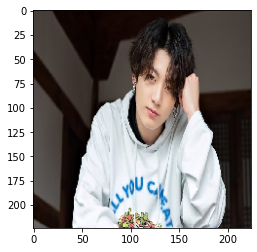

In [149]:
plt.imshow(img)

In [150]:
img = img_to_array(img)
img = np.expand_dims(img, axis=0)

In [151]:
img = preprocess_input(img)

Bước 3: Hiển thị một số ảnh feature của các lớp sau thành dạng lưới các ảnh (grid) giống như Deep Visualization Toolbox: Conv1, Pooling 1, Normalize 1 (nếu có), Conv cuối cùng.
Lưu ý: các bạn cần chuẩn hóa feature map về định dạng ảnh: miền giá trị các điểm ảnh từ 0-255.

In [152]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'block1_conv1' not in layer.name:
        if 'block1_pool' not in layer.name:
            if 'block5_conv3' not in layer.name:
                continue
    print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
17 block5_conv3 (None, 14, 14, 512)


## Conv1

In [153]:
model_conv1 = Model(inputs=model.inputs, outputs=model.layers[1].output)
model_conv1.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [168]:
feature_maps_conv1 = model_conv1.predict(img)

In [171]:
print(feature_maps_conv1.shape)

(1, 224, 224, 64)


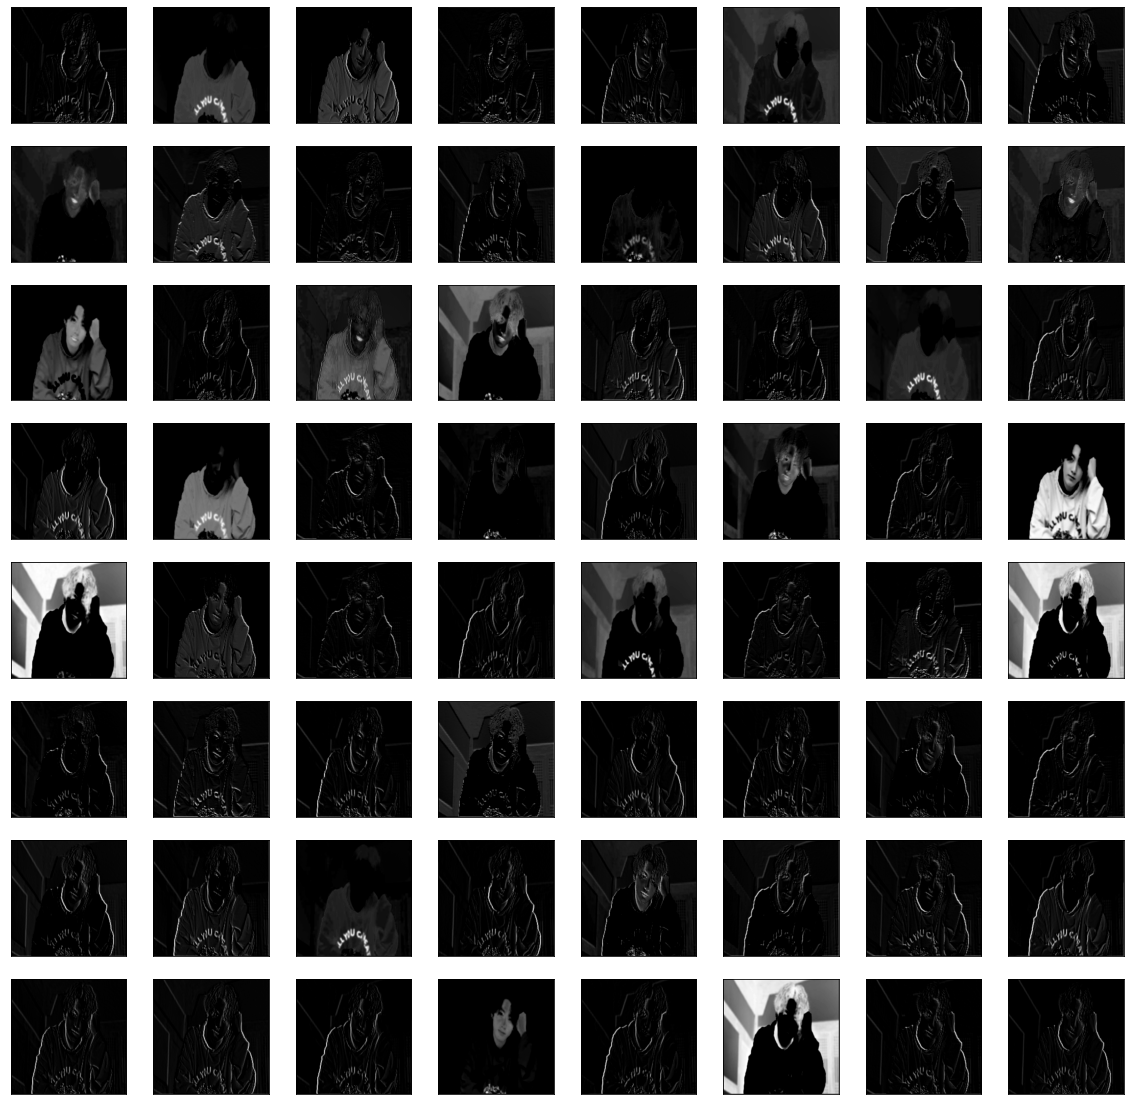

In [155]:
square = 8
ix = 1

plt.figure(figsize=(20,20))
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps_conv1[0,:,:, ix - 1], cmap='gray')
        ix += 1
plt.savefig('conv1.png')
plt.show()

## Pooling1

In [156]:
model_pool1 = Model(inputs=model.inputs, outputs=model.layers[3].output)
model_pool1.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [162]:
feature_maps_pool1 = model_pool1.predict(img)

In [164]:
print(feature_maps_pool1.shape)

(1, 112, 112, 64)


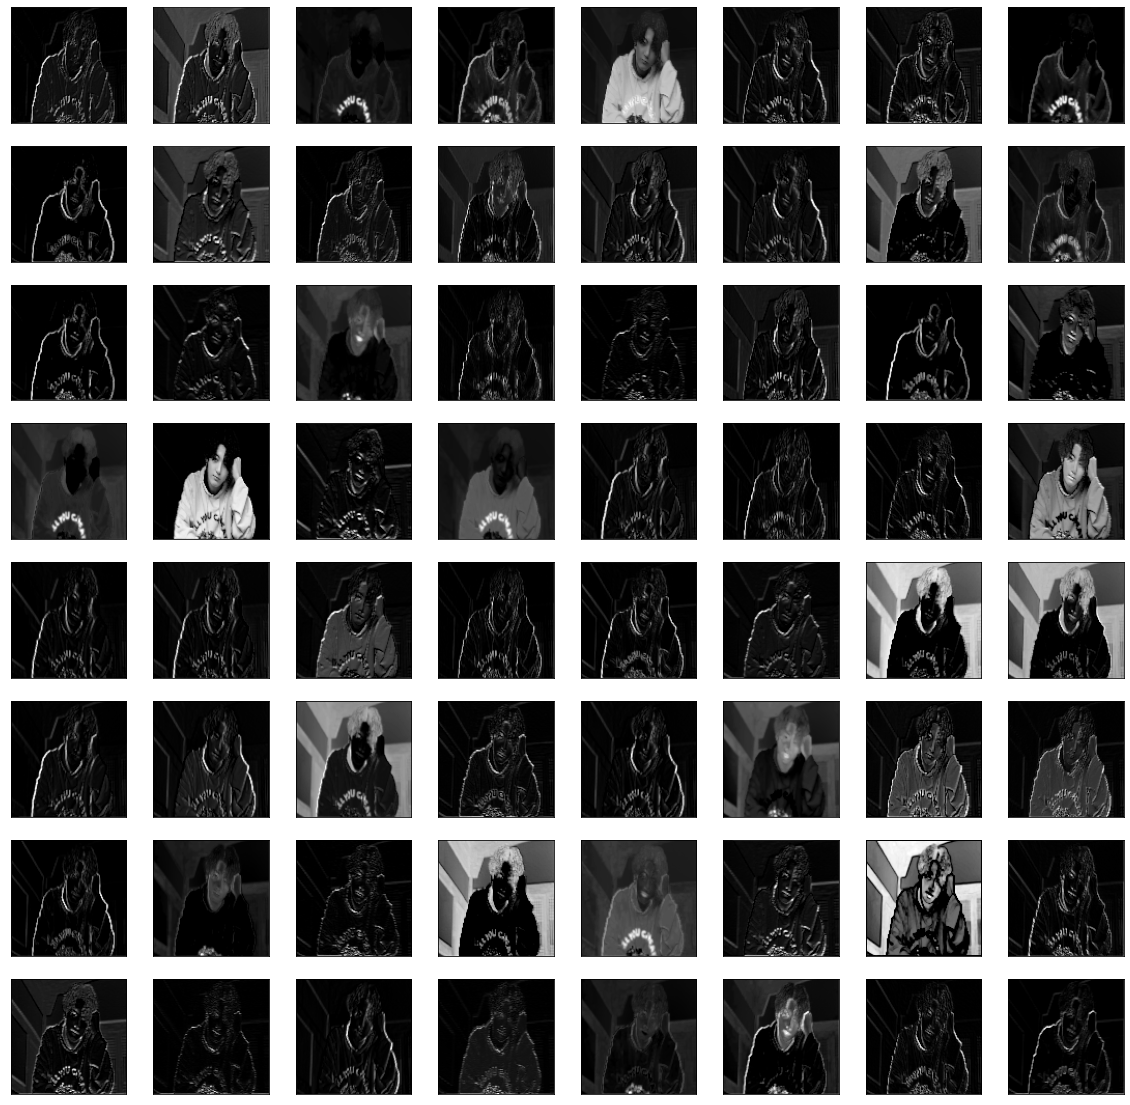

In [166]:
square = 8
ix = 1

plt.figure(figsize=(20,20))
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps_pool1[0,:,:, ix - 1], cmap='gray')
        ix += 1
plt.savefig('pool1.png')
plt.show()

## Last Conv

In [159]:
model_conv5 = Model(inputs=model.inputs, outputs=model.layers[17].output)
model_conv5.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [172]:
feature_maps_conv5 = model_conv5.predict(img)

In [174]:
print(feature_maps_conv5.shape)

(1, 14, 14, 512)


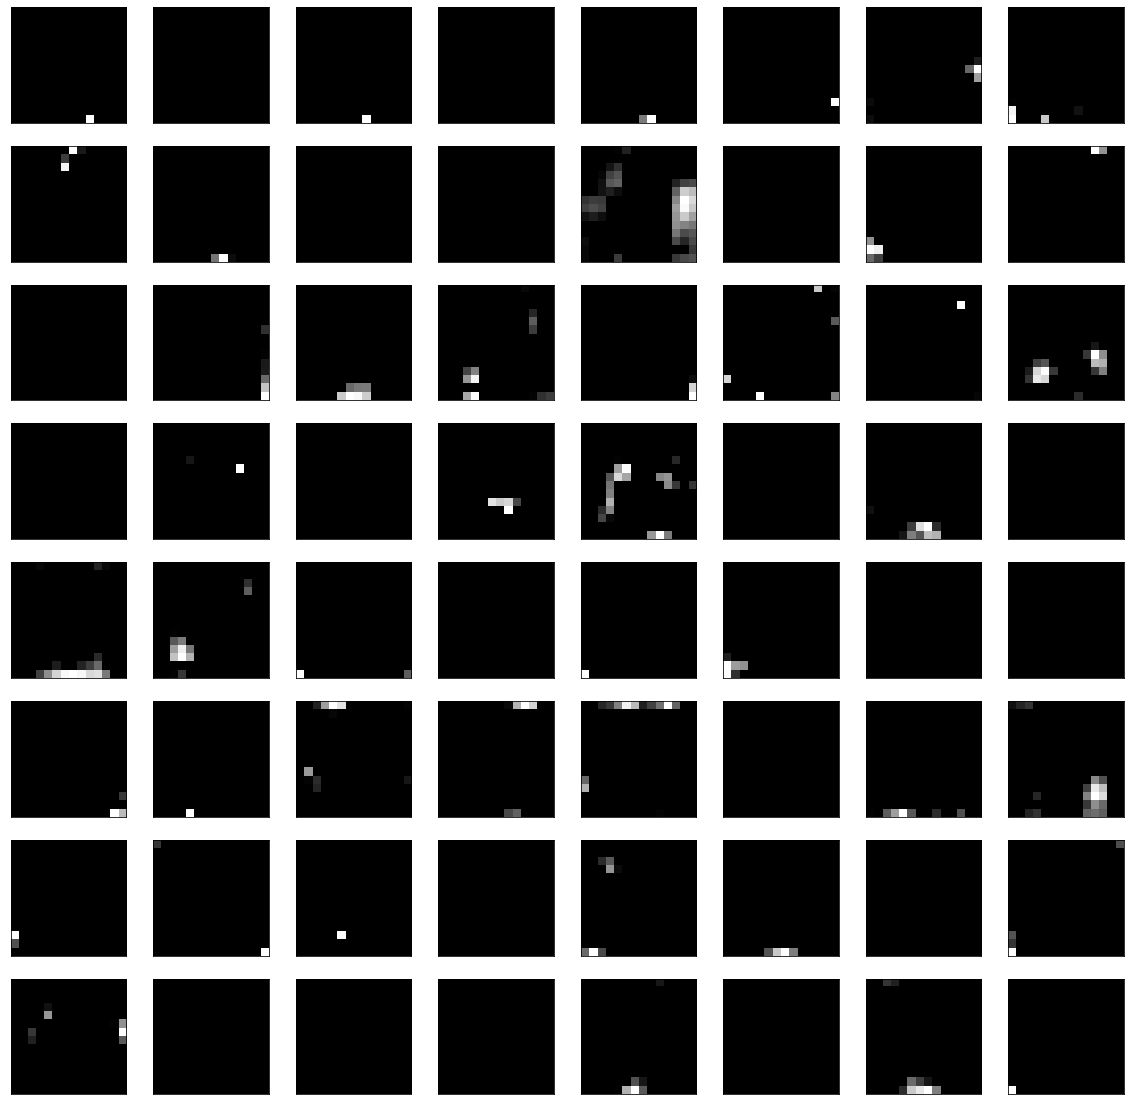

In [161]:
square = 8
ix = 1

plt.figure(figsize=(20,20))
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps_conv5[0,:,:, ix - 1], cmap='gray')
        ix += 1
plt.savefig('last_conv.png')
plt.show()